In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("mushroom_dataset.xlsx")

In [3]:
df.head()

,Cap Color,Stalk Shape,Solitary,Edible
0,Brown,Tapering,Yes,1
1,Brown,Enlarging,Yes,1
2,Brown,Enlarging,No,0
3,Brown,Enlarging,No,0
4,Brown,Tapering,Yes,1


# One Hot Encoding

In [4]:
df=pd.get_dummies(df,['Cap Color','Stalk Shape','Soltary']) # we can also use the sklearn libraries onehotencoder method 
df

,Edible,Cap Color_Brown,Cap Color_Red,Stalk Shape_Enlarging,Stalk Shape_Tapering,Soltary_No,Soltary_Yes
0,1,1,0,0,1,0,1
1,1,1,0,1,0,0,1
2,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0
4,1,1,0,0,1,0,1
5,0,0,1,0,1,0,1
6,0,0,1,1,0,1,0
7,1,1,0,1,0,0,1
8,1,0,1,0,1,1,0
9,0,1,0,1,0,1,0


In [5]:
cols=df.columns #saving the columns names in a variable
cols

Index(['Edible', 'Cap Color_Brown', 'Cap Color_Red', 'Stalk Shape_Enlarging',
       'Stalk Shape_Tapering', 'Soltary_No', 'Soltary_Yes'],
      dtype='object')

In [6]:
x=np.array(df.drop('Edible',axis=1)) #independent variable 

In [7]:
y=np.array(df['Edible']) # dependent variable

In [8]:
x

array([[1, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0]], dtype=uint8)

In [9]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

# Entropy:
<pre>Entroy can be defined as the amount of change
    Formula :
             -c*log<sub>2</sub><sup>(c)</sup>-(1-c)*log<sub>2</sub><sup>(1-c)</sup>
             here c is the number of correct values

In [10]:
def entropy(x):
    if(len(x)==0):
        return 0;
    
    crt=len(x[x==1])/len(x)
    
    if crt==0 or crt==1:  # when all the correct or incorrect the value is zero
        return 0;
    
    ans=(-crt*(np.log2(crt))-(1-crt)*(np.log2(1-crt)))    
    return ans

In [11]:
entropy(x[3]) 

1.0

# Split:
<pre>We have to slite the tree based on a secific feature
     To do this, we will keep the true values at right and false values at left

In [12]:
def split(x,data_no,feature):  #every time we have to split using secific data only, so to knew that secific data we have this data_no variable which will contain the specific data indexes
    left=[] 
    right=[]  #to store the true colulmns
    for i in data_no:
        if(x[i][feature]==1):
            right.append(i) #storing the true column index
        else:
            left.append(i) #storing the false column index
    return left,right

In [13]:
left,right=split(x,[0,1,2,3,4,5,6,7,8,9],1) #checking the split method by spliting the data with respec to 'Cap Color_Red' column
print(left,right)

[0, 1, 2, 3, 4, 7, 9] [5, 6, 8]


From the result we can see that the Cap Color_Red column is false for the data with indexes 0,1,2,3,4,7,9 and true for 5,6,8

# Information gain
<pre>The information gain is used to select which column or feature is the best among all the data to split.
It is simply called as the weighted entropy.
Formula:
        root_entropy - (w1*data1_entropy + w2*data2_entropy)
        here w1 is the weight of data1 means total data/total data in root
             w2 is the weight of data2

In [14]:
def information_gain(x,y,data_no,feature):
    root_entropy=entropy(y[data_no])
    left,right=split(x,data_no,feature)
    left_weight=len(left)/len(data_no) #w1
    right_weight=len(right)/len(data_no) #w2
    info=root_entropy-(left_weight*entropy(y[left])+right_weight*entropy(y[right]))
    return info

In [15]:
information_gain(x,y,[0,1,2,3,4,5,6,7,8,9],3) #testing the method

0.12451124978365313

# Tree creation
- Now we have to create a tree based on the information gain on the sepcific data each time we have.
- Once the feature or column is selected based on the info gain it has to be splited and that index has to be saved in a  tree format.
- Then call the function with only the left index data to classify it seperatly and same for right.
- Finally save all the columns split index in a Binary tree and return its object.

In [81]:
import graphviz

class Tree:

    def __init__(self,data):  #creating the tree structure 
        self.left=None
        self.right=None
        self.data=data
        
    def display(self): #in-order traversel
        if(self.left):
            self.left.display()
        print(self.data)
        if(self.right):
            self.right.display()    
            
    def visualize_binary_tree(root):  #visualizing the tree
        dot = graphviz.Digraph()
        dot.node(str(root.data))

        def add_nodes_edges(node):
            if node.left:
                dot.node(str(node.left.data))
                dot.edge(str(node.data), str(node.left.data))
                add_nodes_edges(node.left)

            if node.right:
                dot.node(str(node.right.data))
                dot.edge(str(node.data), str(node.right.data))
                add_nodes_edges(node.right)

        add_nodes_edges(root)
        dot.render('binary_tree', view=True, format='png')  #saving the image with the name of binary_tree

In [82]:
def generate_tree(x,y,data_no,max_depth,current_depth,sign,self):
    
    if (current_depth>max_depth): #break the iteration when the max is reached 
        return 0;
    
    if (len(data_no)==1): #when there is only one data then that y value is the answer
        print(f"The {sign} of depth {current_depth-1} answer is : {y[data_no][0]}\n")
        temp=Tree((y[data_no][0],current_depth,sign)) #creating the node
        self=temp #connecing the node
        return self
    
    
    max_info=0
    max_index=0
    for i in range(x.shape[1]):
        information=information_gain(x,y,data_no,i)
        if(information>max_info): #finding the index with maximum info_gain value
            max_index=i
            max_info=information
            
    
    temp=Tree((max_index,current_depth,sign)) #create a node
    self=temp #connecting the node
    print(f"The best column to split among {data_no} is {cols[max_index+1]} {max_index})")
    print(f"sign: {sign}, depth: {current_depth}")
    left,right=split(x,data_no,max_index)
    print(f"Left values are : {left}")
    print(f"Right indexs are : {right}\n\n")
    
    
    if(len(left)==0): #if there is no values in the left side, then all the right values have same value, so we can use anyone of the value as answer
        print(f"The {sign} of depth {current_depth} answer is : {y[data_no[0]]}\n")
        temp=Tree((y[data_no[0]],current_depth,sign)) #creating the node
        self=temp #connecting the node
        return self
    
    if(len(right)==0): #if there is no values in the right side, then all the left values have same value, so we can use anyone of the value as answer
        print(f"The {sign} of depth {current_depth} answer is : {y[data_no[0]]}\n")
        temp=Tree((y[data_no[0]],current_depth,sign)) #creating the node
        self=temp #connecting the node
        return self
    
    self.left=generate_tree(x,y,left,max_depth,current_depth+1,"left",self) #recursively calling the function with the left values
    self.right=generate_tree(x,y,right,max_depth,current_depth+1,"right",self) #recursively calling the function with the right values
    
    return self #finaly returning the head of the binary tree 

In [83]:
decision=Tree(-1) #creating a node to start with
ans=generate_tree(x,y,[0,1,2,3,4,5,6,7,8,9],5,0,"root",decision) #calling the generate function and storing the tree in ans variable

The best column to split among [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] is Soltary_No 4)
sign: root, depth: 0
Left values are : [0, 1, 4, 5, 7]
Right indexs are : [2, 3, 6, 8, 9]


The best column to split among [0, 1, 4, 5, 7] is Cap Color_Brown 0)
sign: left, depth: 1
Left values are : [5]
Right indexs are : [0, 1, 4, 7]


The left of depth 1 answer is : 0

The best column to split among [0, 1, 4, 7] is Cap Color_Brown 0)
sign: right, depth: 2
Left values are : []
Right indexs are : [0, 1, 4, 7]


The right of depth 2 answer is : 1

The best column to split among [2, 3, 6, 8, 9] is Stalk Shape_Enlarging 2)
sign: right, depth: 1
Left values are : [8]
Right indexs are : [2, 3, 6, 9]


The left of depth 1 answer is : 1

The best column to split among [2, 3, 6, 9] is Cap Color_Brown 0)
sign: right, depth: 2
Left values are : [6]
Right indexs are : [2, 3, 9]


The left of depth 2 answer is : 0

The best column to split among [2, 3, 9] is Cap Color_Brown 0)
sign: right, depth: 3
Left values are : []

In [84]:
ans.display()  #displaying the tree using in-order traversel

(0, 2, 'left')
(0, 1, 'left')
(1, 2, 'right')
(4, 0, 'root')
(1, 2, 'left')
(2, 1, 'right')
(0, 3, 'left')
(0, 2, 'right')
(0, 3, 'right')


In [62]:
ans.visualize_binary_tree()  # when calling this function it store the result as a png format

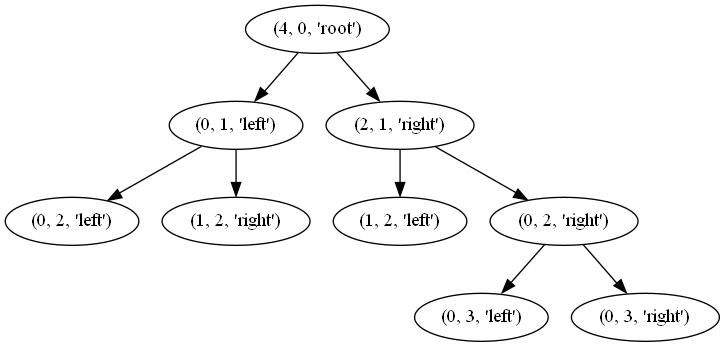

In [63]:
from IPython import display   # displaying the visualized tree image
display.Image("binary_tree.png")

In [85]:
def predict(decision,x):
    if(decision.left==None and decision.right==None): #when the leaf node is reached return the data
        return decision.data[0]
    if(x[decision.data[0]]==1):
        return predict(decision.right,x)
    else:
        return predict(decision.left,x)
    

In [86]:
def predict_all(decision,x):
    ans=[]
    for i in range(x.shape[0]):
        ans.append(predict(decision,x[i]))
    return ans

In [87]:
y_pre=predict_all(ans,x)

In [89]:
np.vstack((y,y_pre))  #comparing the true and predicted values

array([[1, 1, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)